# Take a look at the similarty graph from the dataset

In [1]:
import pandas as pd
import numpy as np
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 
import matplotlib.pyplot as plt

In [2]:
#ref https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#metrics-available-in-networkx

In [3]:
%matplotlib inline

In [4]:
df=pd.read_json('bizbuysell.detail.lines.json',lines=True)

In [5]:
df_s=df[['s_id','s_similar']]
df_s=df_s.explode('s_similar')
df_s=df_s.dropna()
df_s.columns=['from','to']
df_s=df_s.astype({'from': 'int64','to': 'int64'})
df_s=df_s.drop_duplicates()

In [6]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81671 entries, 0 to 38570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   from    81671 non-null  int64
 1   to      81671 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [7]:
Gf=nx.from_pandas_edgelist(df_s, 'from', 'to')

In [8]:
density = nx.density(Gf)
density

0.00012991436937777442

In [9]:
components = nx.connected_components(Gf)
largest_component = max(components, key=len)

In [10]:
subgraph = Gf.subgraph(largest_component)
diameter = nx.diameter(subgraph)
diameter

13

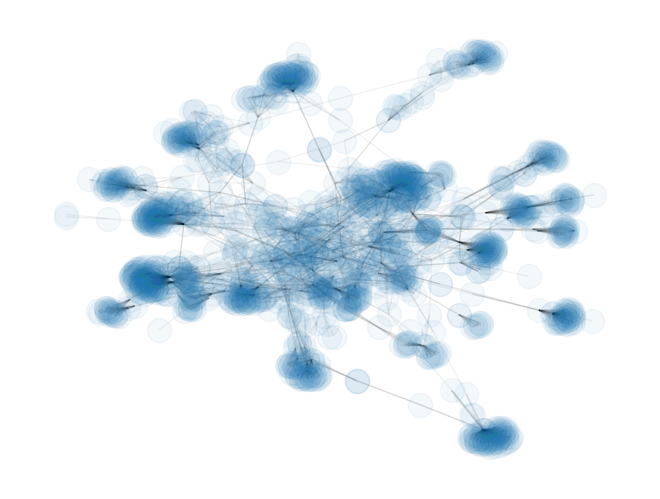

In [11]:
nx.draw(subgraph,alpha=0.05)
plt.show()

In [12]:
triadic_closure = nx.transitivity(subgraph)
triadic_closure 

0.06837476099426386

In [13]:
degree_dict = dict(subgraph.degree(subgraph.nodes()))
nx.set_node_attributes(subgraph, degree_dict, 'degree')

In [14]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [15]:
# Top 20 nodes by degree
sorted_degree[:20]

[(2036239, 124),
 (1916246, 107),
 (2081747, 105),
 (2043964, 93),
 (1995393, 93),
 (2085456, 87),
 (2043868, 84),
 (2080381, 71),
 (2059235, 70),
 (2054271, 69),
 (1987354, 68),
 (2077331, 62),
 (2053524, 61),
 (2061998, 59),
 (1963703, 58),
 (2043779, 54),
 (2085283, 51),
 (1864705, 49),
 (2070922, 49),
 (1809374, 49)]

In [16]:
betweenness_dict = nx.betweenness_centrality(subgraph) 
eigenvector_dict = nx.eigenvector_centrality(subgraph)

nx.set_node_attributes(subgraph, betweenness_dict, 'betweenness')
nx.set_node_attributes(subgraph, eigenvector_dict, 'eigenvector')

In [17]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

top_betweenness = sorted_betweenness[:20]
top_betweenness

[(1995393, 0.11470536331455887),
 (1980576, 0.09416456160257883),
 (2043335, 0.088040144384802),
 (1987354, 0.0801588437917018),
 (2036239, 0.07862307123725878),
 (2018035, 0.07627246793847975),
 (2022849, 0.07438113733413132),
 (2075253, 0.0706562313372731),
 (2047101, 0.06070709799514681),
 (1902972, 0.05933480590495143),
 (2070922, 0.05699432313240277),
 (2078521, 0.05589112760803012),
 (2017483, 0.050662697174189426),
 (2043779, 0.049621669592293055),
 (2085283, 0.049210468047491046),
 (2081747, 0.04727405053095108),
 (2085456, 0.0463057462926304),
 (2053524, 0.04616136095517292),
 (1876385, 0.04549041697237226),
 (2045521, 0.044127728023047895)]

In [18]:
for tb in top_betweenness: 
    degree = degree_dict[tb[0]] 
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: 1995393 | Betweenness Centrality: 0.11470536331455887 | Degree: 93
Name: 1980576 | Betweenness Centrality: 0.09416456160257883 | Degree: 25
Name: 2043335 | Betweenness Centrality: 0.088040144384802 | Degree: 18
Name: 1987354 | Betweenness Centrality: 0.0801588437917018 | Degree: 68
Name: 2036239 | Betweenness Centrality: 0.07862307123725878 | Degree: 124
Name: 2018035 | Betweenness Centrality: 0.07627246793847975 | Degree: 27
Name: 2022849 | Betweenness Centrality: 0.07438113733413132 | Degree: 14
Name: 2075253 | Betweenness Centrality: 0.0706562313372731 | Degree: 20
Name: 2047101 | Betweenness Centrality: 0.06070709799514681 | Degree: 7
Name: 1902972 | Betweenness Centrality: 0.05933480590495143 | Degree: 6
Name: 2070922 | Betweenness Centrality: 0.05699432313240277 | Degree: 49
Name: 2078521 | Betweenness Centrality: 0.05589112760803012 | Degree: 6
Name: 2017483 | Betweenness Centrality: 0.050662697174189426 | Degree: 33
Name: 2043779 | Betweenness Centrality: 0.04962166959229

In [19]:
communities = community.greedy_modularity_communities(subgraph)

In [20]:
modularity_dict = {} 
for i,c in enumerate(communities):
    for name in c:
        modularity_dict[name] = i

nx.set_node_attributes(subgraph, modularity_dict, 'modularity')

In [21]:
class0 = [n for n in subgraph.nodes() if subgraph.nodes[n]['modularity'] == 0]
class0_eigenvector = {n:subgraph.nodes[n]['eigenvector'] for n in class0}
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Name: 2043335 | Eigenvector Centrality: 0.001055159304662532
Name: 2081747 | Eigenvector Centrality: 0.00026926146027084604
Name: 2085456 | Eigenvector Centrality: 0.0002649500644623306
Name: 2070922 | Eigenvector Centrality: 0.00023362633144889116
Name: 2061392 | Eigenvector Centrality: 0.00019902968431419516


In [22]:
for i,c in enumerate(communities): 
    if len(c) > 2: 
        print('Class '+str(i)+':', list(c))

Class 0: [2074630, 2070029, 2060301, 1911314, 2055187, 1890324, 1970200, 2060831, 2020389, 2068524, 2067510, 2079288, 2052666, 2083913, 2072139, 2037323, 2061392, 2085456, 2032216, 2010210, 2085485, 2010734, 2047087, 2061939, 1989749, 1991798, 2059382, 2063994, 2065022, 2035838, 2054271, 1968265, 1996940, 1810061, 1964174, 2039441, 2079377, 2072210, 2069651, 2028196, 2069668, 2036903, 1846952, 2027687, 2075310, 2017457, 2012851, 2075319, 1989304, 1751737, 1953470, 2061513, 2003149, 1939664, 1944785, 2043090, 2018515, 2042580, 1980630, 1955032, 2079452, 2034399, 2016481, 2071788, 1983730, 2068724, 2076406, 2010362, 2068735, 2068737, 1947398, 2068742, 1931018, 1979658, 2076947, 2050835, 2085139, 1990933, 2079001, 2068762, 1989914, 1962780, 1820451, 1607459, 1990949, 2067751, 2074920, 1989928, 2018089, 1990443, 1958188, 2007852, 2021169, 2079028, 1960757, 2076989, 1975614, 2051392, 2047813, 1990981, 2071370, 2030415, 2065744, 2075475, 2051933, 2035549, 1991008, 2057058, 2056548, 1737062, 